# Part 1: (Hammering the Screw)  
  
  Scenario:  **Classify the fashion image into one of the 10 categories**  
  Inventory: Vanilla NN (hammer) and CNN (new tool)

<center><img src='https://drive.google.com/uc?id=1xL9UKISIdQPOSh3B_Z_ac3-8MzoW3jp7' width=1000 height=500>
</center>


In [ ]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

but Gdown can't. Please check connections and permissions.


In [ ]:
!unzip /content/clothing-dataset-small.zip

Archive:  /content/clothing-dataset-small.zip
replace clothing-dataset-small/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Part 1: (Hammering the Screw)  
  
  Scenario:  **Classify the fashion image into one of the 10 categories**  
  Inventory: Vanilla NN (hammer) and CNN (new tool)

<center><img src='https://drive.google.com/uc?id=1xL9UKISIdQPOSh3B_Z_ac3-8MzoW3jp7' width=1000 height=500>
</center>


In [ ]:
# Import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class_dirs = os.listdir("clothing-dataset-small/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'clothing-dataset-small/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

Exception ignored in: <function _xla_gc_callback at 0x7aa9188593f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


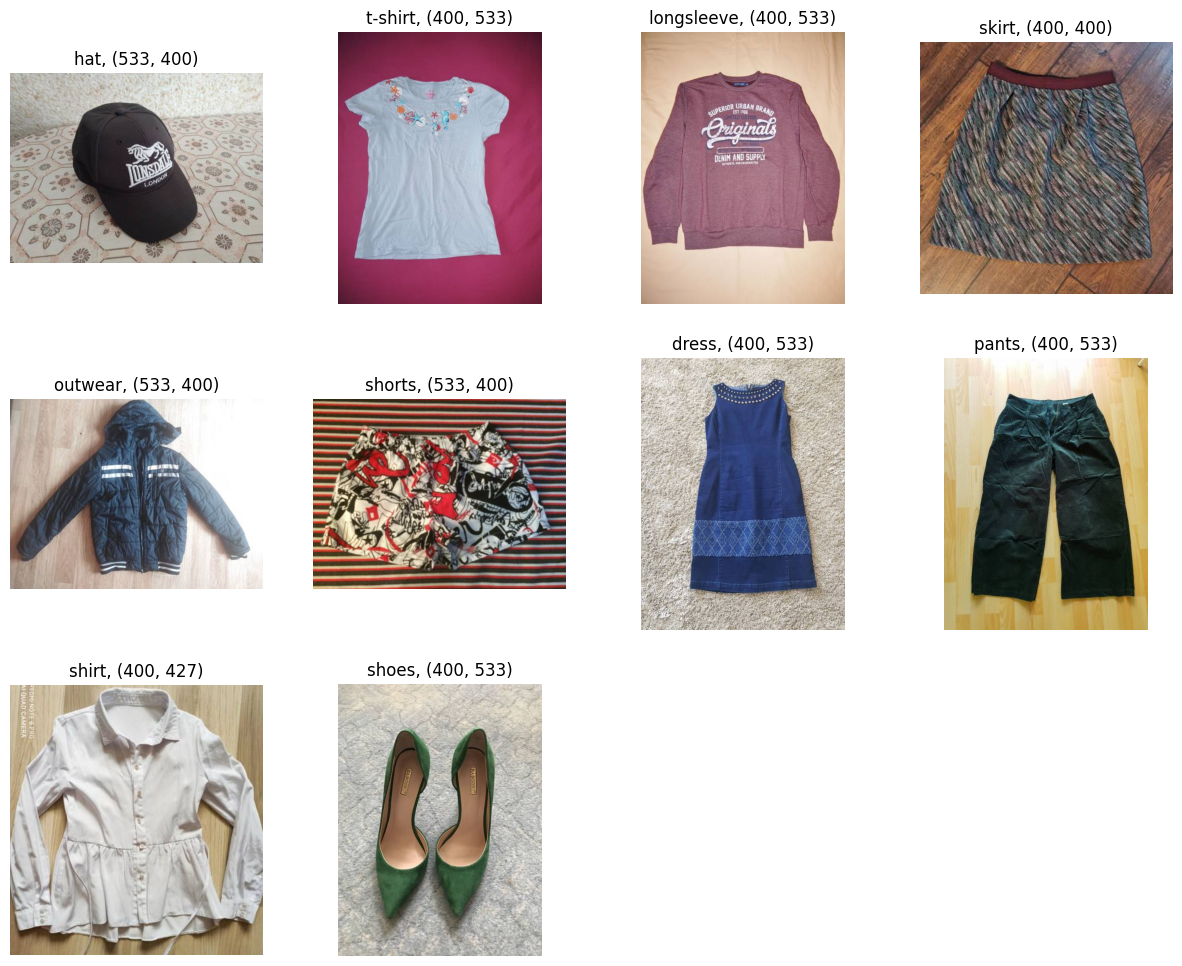

In [ ]:
## Viz Random Sample from each class

plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [ ]:
#Input -> Image
#Output -> Class(Type of dress shown on the image)

Count of training samples per class:
         class  count
0         hat    123
1     t-shirt    795
2  longsleeve    455
3       skirt    112
4     outwear    184
5      shorts    202
6       dress    241
7       pants    468
8       shirt    290
9       shoes    198


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

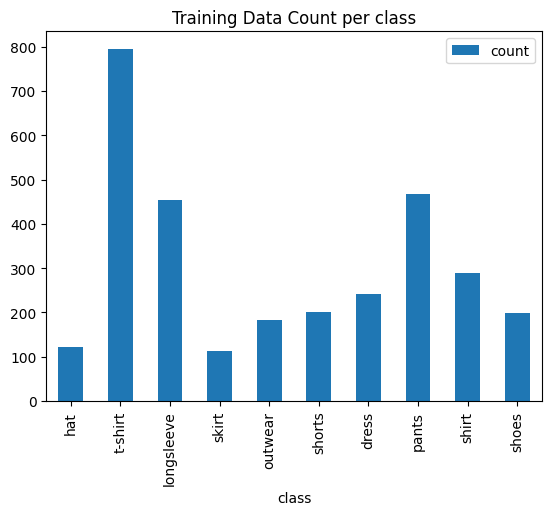

In [ ]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/test", shuffle = False,
)


Loading Train Data...
Found 3068 files belonging to 10 classes.

Loading Validation Data...
Found 341 files belonging to 10 classes.

Loading Test Data...
Found 372 files belonging to 10 classes.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#R-> 256x256
#G-> 256x256
#B-> 256x256

#Image -> -> 256x256x3

In [ ]:
height, width = 128, 128 # Optional, not required if we already have resized the data from `image_dataset_from_directory` function.

# Data Processing Stage with resizing and rescaling operations
data_preprocess_with_flatten = keras.Sequential(
    name = "data_preprocess_with_flatten",
    layers = [
        layers.Resizing(height, width),
        layers.Rescaling(1./255), #Min Max Scaling
        layers.Flatten(), # Note: We prefer NOT to add `layers.Flatten()` as part of preprocessing layers (rather as model definition itself)!
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess_with_flatten(x), y))


In [ ]:
sample = next(iter(train_ds))[0]

print(sample)

tf.Tensor(
[[0.09552696 0.08768383 0.09944853 ... 0.5103711  0.47507697 0.4084103 ]
 [0.19276579 0.04910769 0.06562117 ... 0.4493935  0.12782486 0.18272682]
 [0.63098645 0.5407904  0.6113786  ... 0.93143386 0.939277   0.9353554 ]
 ...
 [0.49344397 0.49344397 0.46207142 ... 0.19694066 0.19694066 0.1655681 ]
 [0.54509807 0.43921572 0.2627451  ... 0.81038606 0.73587626 0.5672488 ]
 [0.15490197 0.04509804 0.10000001 ... 0.2515235  0.07401124 0.13448918]], shape=(32, 49152), dtype=float32)


In [ ]:
128*128*3

49152

In [ ]:
sample.shape

TensorShape([32, 49152])

In [ ]:
# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), # Shape Preprocessing
        layers.Rescaling(1.0/255), # Value Preprocessing
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
num_classes = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)), # alternatively, input_shape=next(iter(train_ds))[0].shape[1:]
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.1818 - loss: 26.9814 - val_accuracy: 0.3871 - val_loss: 2.6138
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.3698 - loss: 2.1765 - val_accuracy: 0.4340 - val_loss: 1.8231
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.3924 - loss: 2.0388 - val_accuracy: 0.3842 - val_loss: 1.9756
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.4545 - loss: 1.7927 - val_accuracy: 0.4340 - val_loss: 1.7841
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.4989 - loss: 1.5791 - val_accuracy: 0.4721 - val_loss: 1.6151
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.5261 - loss: 1.5129 - val_accuracy: 0.4663 - val_loss: 1.6069
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.5480 - loss: 1.3743 - val_accuracy: 0.4106 - val_loss: 1.9341
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.5124 - loss: 1.4783 - val_accuracy: 0.4663

In [ ]:
model.summary()

Model: "model_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │      50,332,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,792,928 (579.04 MB)

 Trainable params: 50,597,642 (193.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,195,286 (386.03 MB)

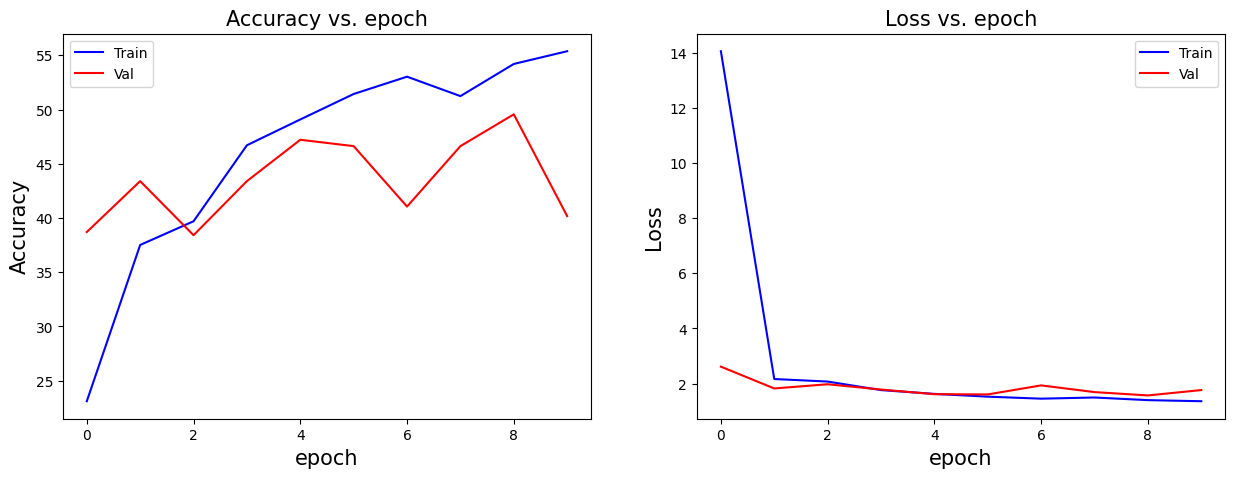

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [ ]:
num_classes = 10
hidden_size = 256

model = keras.Sequential(
    name="model_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=hidden_size, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [ ]:
3*3*3*16 +16

448

In [ ]:
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
layers.Conv2D(filters=16, #no of filters
              kernel_size=3,  #3X3
              strides=1,
              padding="same",
              activation='relu',
              input_shape=(height, width, 3))

<Conv2D name=conv2d_11, built=False>

In [ ]:
help(layers.MaxPooling2D) #2x2 with stide of 2

Help on class MaxPooling2D in module keras.src.layers.pooling.max_pooling2d:

class MaxPooling2D(keras.src.layers.pooling.base_pooling.BasePooling)
 |  MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, name=None, **kwargs)
 |  
 |  Max pooling operation for 2D spatial data.
 |  
 |  Downsamples the input along its spatial dimensions (height and width)
 |  by taking the maximum value over an input window
 |  (of size defined by `pool_size`) for each channel of the input.
 |  The window is shifted by `strides` along each dimension.
 |  
 |  The resulting output when using the `"valid"` padding option has a spatial
 |  shape (number of rows or columns) of:
 |  `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
 |  (when `input_shape >= pool_size`)
 |  
 |  The resulting output shape when using the `"same"` padding option is:
 |  `output_shape = math.floor((input_shape - 1) / strides) + 1`
 |  
 |  Args:
 |      pool_size: int or tuple of 2 i

In [ ]:
help(layers.Conv2D)

Help on class Conv2D in module keras.src.layers.convolutional.conv2d:

class Conv2D(keras.src.layers.convolutional.base_conv.BaseConv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer.
 |  
 |  This layer creates a convolution kernel that is convolved with the layer
 |  input over a 2D spatial (or temporal) dimension (height and width) to
 |  produce a tensor of outputs. If `use_bias` is True, a bias vector is created
 |  and added to the outputs. Finally, if `activation` is not `None`, it is
 |  applied to the outputs as well.
 |  
 |  Args:
 |      filters: int, the dimension of the output space (the number of filters
 |          in the convolution).
 |      kernel_s

In [ ]:
num_classes = 10
hidden_size = 256

model = keras.Sequential(
    name="model_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=hidden_size, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

ValueError: Computed output size would be negative. Received `inputs shape=(None, 0, 0, 16)`, `kernel shape=(3, 3, 16, 16)`, `dilation_rate=[1 1]`.

In [ ]:
model.summary()

In [ ]:
help(layers.Conv2D)

In [ ]:
layers.Conv2D(filters=16,
              kernel=3 #3x3
              strides = 1,
              padding="same",
              activation="relu"
              )

In [ ]:
def arch_1(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(), #Edges
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(), #POb
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )

In [ ]:
model.summary()